In [9]:
%pip install matplotlib

%pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### data collection and analysis

In [10]:
# loading the data frok csv to pandas
ins_dataset = pd.read_csv('insurance.csv')

In [11]:
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#number of rows and columns
ins_dataset.shape

(1338, 7)

In [13]:
## getting some info from the dataset 
ins_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categprical features
sex
smoker
region

In [14]:
## checking for missing va;ues
ins_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### DAta Analysis

In [15]:
## statistical measures of thr dataset
ins_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/var/folders/7q/rb8p3vns3_b8xy_1w1wr7jp40000gn/T/ipykernel_869/652422745.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ins_dataset['age'])


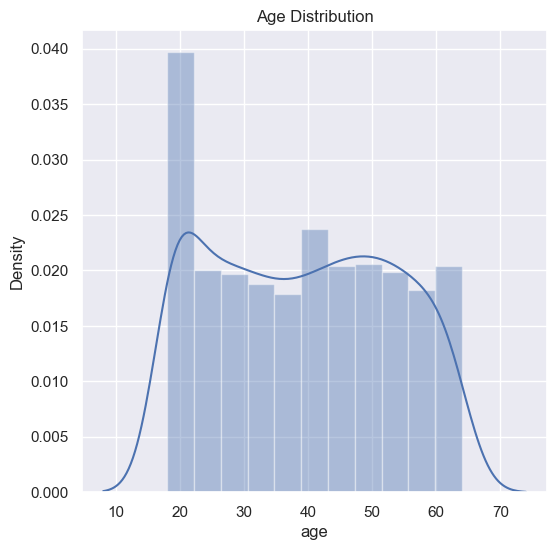

In [16]:
## distribution of age value
sn.set()
plt.figure(figsize=(6,6))
sn.distplot(ins_dataset['age'])
plt.title('Age Distribution')
plt.show()

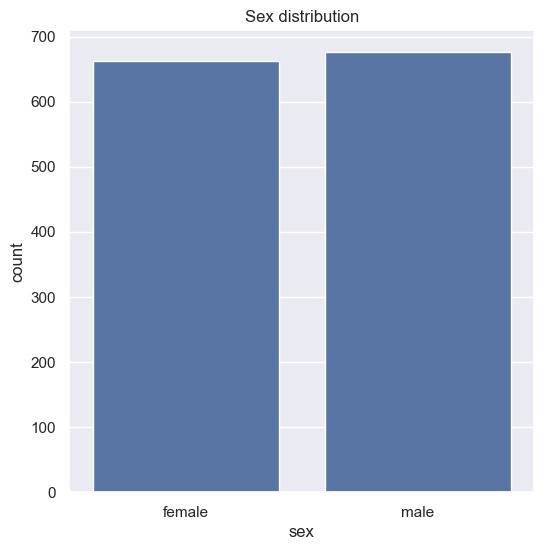

In [17]:
## Gender column
plt.figure(figsize=(6,6))
sn.countplot(x='sex', data=ins_dataset)
plt.title('Sex distribution')
plt.show()

In [18]:
ins_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/var/folders/7q/rb8p3vns3_b8xy_1w1wr7jp40000gn/T/ipykernel_869/935433884.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ins_dataset['bmi'])


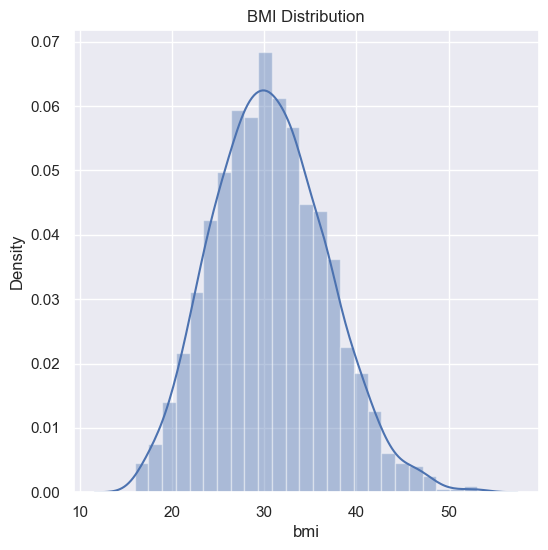

In [19]:
## distribution of BMI value
sn.set()
plt.figure(figsize=(6,6))
sn.distplot(ins_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

### Normal BMI range --->18.5 to 24.9

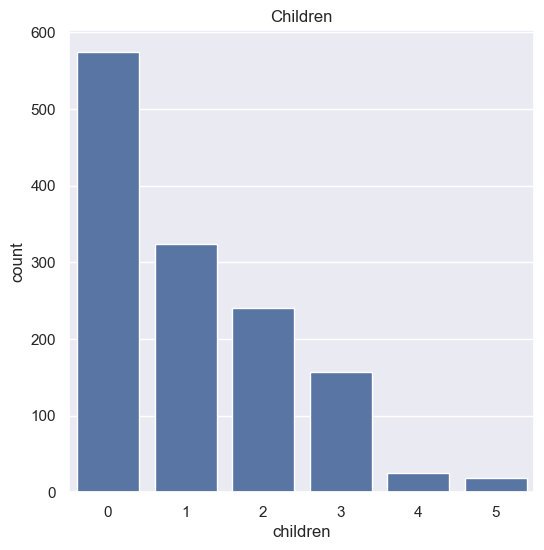

In [20]:
## children column 
plt.figure(figsize=(6,6))
sn.countplot(x='children',data=ins_dataset)
plt.title('Children')
plt.show()

In [21]:
ins_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

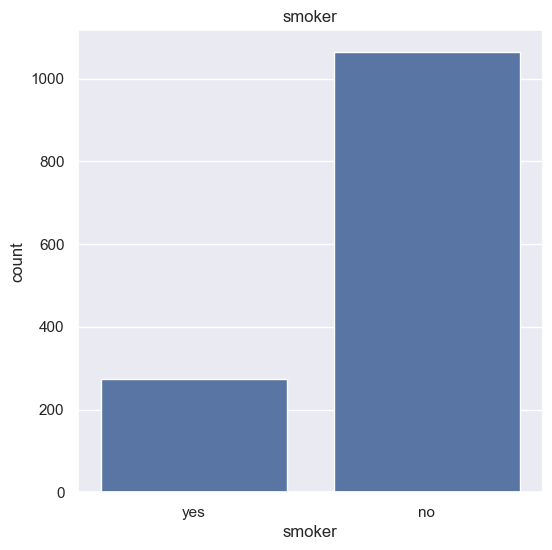

In [22]:
## smoker column 
plt.figure(figsize=(6,6))
sn.countplot(x='smoker',data=ins_dataset)
plt.title('smoker')
plt.show()

In [23]:
ins_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

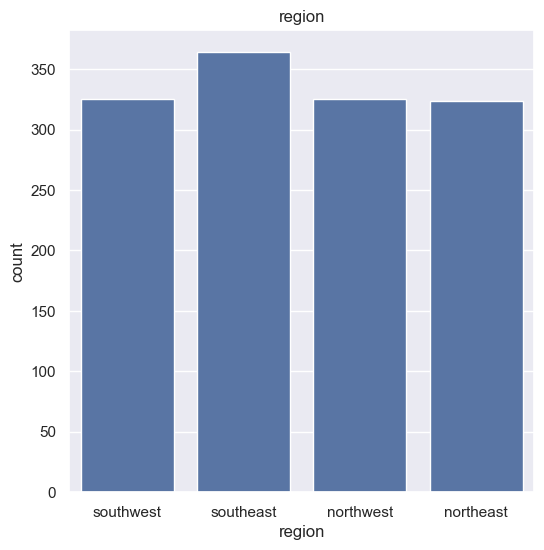

In [24]:
## region column 
plt.figure(figsize=(6,6))
sn.countplot(x='region',data=ins_dataset)
plt.title('region')
plt.show()

In [25]:
ins_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/var/folders/7q/rb8p3vns3_b8xy_1w1wr7jp40000gn/T/ipykernel_869/3543582925.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ins_dataset['charges'])


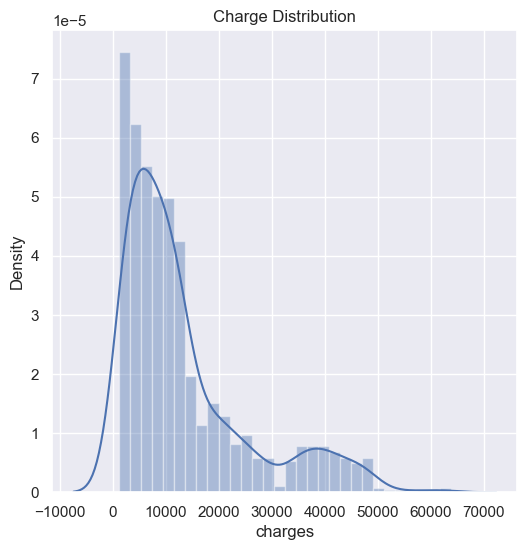

In [26]:
## distribution of charges value
sn.set()
plt.figure(figsize=(6,6))
sn.distplot(ins_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

### DAta preprocessing

In [27]:
## Encoding the categorical variables
ins_dataset.replace({
	'sex': {'male': 0, 'female': 1},
	'smoker': {'yes': 1, 'no': 0},
	'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}
}, inplace=True)

/var/folders/7q/rb8p3vns3_b8xy_1w1wr7jp40000gn/T/ipykernel_869/1573467498.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ins_dataset.replace({


In [28]:
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


### Splitting the features and target

In [29]:
X = ins_dataset.drop(columns='charges',axis=1)
Y = ins_dataset['charges']

In [30]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [31]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting data into training and testing data

In [32]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## model training

In [34]:
### Linear regression model
regressor = LinearRegression()

In [35]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [36]:
## Model Evaluation

In [37]:
## Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [38]:
### R sq value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value:' , r2_train)

R squared value: 0.751505643411174


In [39]:
## Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [40]:
### R sq value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:' , r2_test)

R squared value: 0.7447273869684076


In [41]:
###Building predictive system

In [42]:
input_data = (31,1,25.74,0,1,0)
## changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

## reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

[27688.18228711]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
import joblib

# Save your trained model
joblib.dump(regressor, "regressor_model.pkl")



['regressor_model.pkl']

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, Y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [45]:
import joblib
joblib.dump(pipeline, 'insurance_model.pkl')


['insurance_model.pkl']

In [46]:
import joblib
import pandas as pd

model = joblib.load('insurance_model.pkl')

input_data = pd.DataFrame([{
    'age': 31,
    'sex': 'female',
    'bmi': 25.74,
    'children': 0,
    'smoker': 'no',
    'region': 'southeast'
}])

prediction = model.predict(input_data)
print(prediction)


[16005.481857]


In [47]:
print(X['smoker'].unique())
print(X['sex'].unique())
print(X['region'].unique())


[1 0]
[1 0]
[1 0 3 2]


In [48]:
input_data = pd.DataFrame([{
    'age': 31,
    'sex': 'female',        # must match training
    'bmi': 25.74,
    'children': 0,
    'smoker': 'no',         # must match training
    'region': 'southeast'   # must match training
}])


In [49]:
print(model)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])


In [50]:
feature_names = model.named_steps['prep'].get_feature_names_out()
coeffs = model.named_steps['model'].coef_

for f, c in zip(feature_names, coeffs):
    if 'smoker' in f:
        print(f, c)


cat__smoker_0 -11956.172615134592
cat__smoker_1 11956.172615134588


In [51]:
input_data = pd.DataFrame([{
    'age': 31,
    'sex': 'female',
    'bmi': 25.74,
    'children': 0,
    'smoker': 0,      # 🔥 THIS IS THE FIX
    'region': 'southeast'
}])


In [52]:
prediction = model.predict(input_data)
print(prediction)


[4049.30924186]
